# Hospital Charge Analysis

Dataset: https://campuspro-uploads.s3.us-west-2.amazonaws.com/c2c9e289-0f37-40e3-a076-39693a7d568a/dcb6f459-68eb-44d9-8284-44a96c0bd540/Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_All_Diagnosis-Related_Groups__DRG__-_FY2017.csv

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy import stats

In [3]:
df = pd.read_csv('Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_All_Diagnosis-Related_Groups__DRG__-_FY2017.csv')
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88
...,...,...,...,...,...,...,...,...,...,...,...,...
196320,683 - RENAL FAILURE W CC,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,14,50528.14,4924.07,3647.50
196321,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,23,47396.65,4251.26,3450.22
196322,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,22,147342.18,18504.95,13261.09
196323,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,17201 INTERSTATE 45 SOUTH,THE WOODLANDS,TX,77385,TX - Houston,25,118123.00,11911.40,11016.52


# 1: Distributions and outliers

/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 4934'. Pick better value with 'binwidth'.


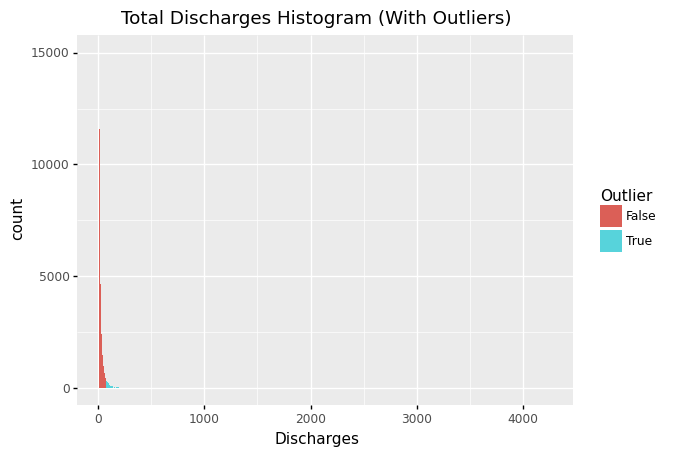

/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 102'. Pick better value with 'binwidth'.


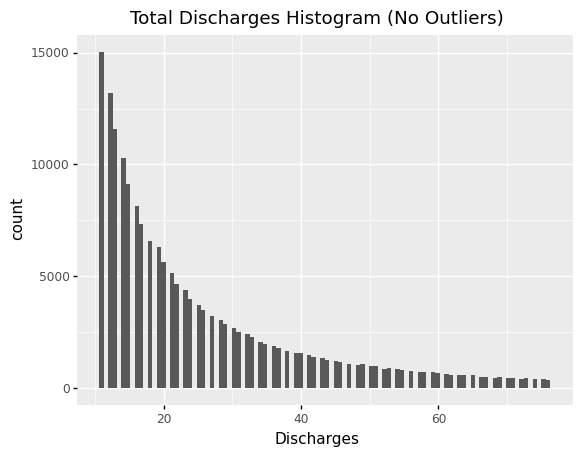




Location of Random Outliers:
                 Provider Street Address     Provider City Provider State
51322       1133 EAGLE'S LANDING PARKWAY       STOCKBRIDGE             GA
103373                       1015 BOWLES            FENTON             MO
125808                 211 CHURCH STREET  SARATOGA SPRINGS             NY
143               1108 ROSS CLARK CIRCLE            DOTHAN             AL
10503                          4001 J ST        SACRAMENTO             CA
29132                  80 SEYMOUR STREET          HARTFORD             CT
145861           1923 SOUTH UTICA AVENUE             TULSA             OK
165994         1801 N JACKSON ST BOX 460         TULLAHOMA             TN
73412               2501 KENTUCKY AVENUE           PADUCAH             KY
102222  ONE BARNES-JEWISH HOSPITAL PLAZA       SAINT LOUIS             MO


In [4]:
discharge_df = pd.DataFrame()
discharge_df['Discharges'] = df['Total Discharges']
dis_q1, dis_q3= np.percentile(discharge_df, [25, 75])
dis_iqr = dis_q3 - dis_q1
dis_upper = dis_q3 + (1.5 * dis_iqr)
discharge_df['Outlier'] = discharge_df['Discharges'] > dis_upper

print(ggplot(discharge_df, aes(x='Discharges', fill='Outlier')) + geom_histogram() + 
      ggtitle('Total Discharges Histogram (With Outliers)'))

dis_no_outlier = discharge_df
dis_no_outlier["Outlier"] = dis_no_outlier["Outlier"].astype(int)
dis_no_outlier = dis_no_outlier[dis_no_outlier.Outlier != 1]

print(ggplot(dis_no_outlier, aes(x='Discharges')) + geom_histogram() +
      ggtitle('Total Discharges Histogram (No Outliers)'))

outliers = discharge_df
outliers["Outlier"] = outliers["Outlier"].astype(int)
outliers = outliers[outliers.Outlier == 1]
outlier_index = outliers.sample(10, random_state=6).index.tolist()
print('')
print('')
print('Location of Random Outliers:')
print(df.iloc[outlier_index, 3:6])

There doesn't appear to be anything surprising about the 10 random outlier locations above. These locations seem to be expected outliers as they are areas of dense population.

/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 2064'. Pick better value with 'binwidth'.


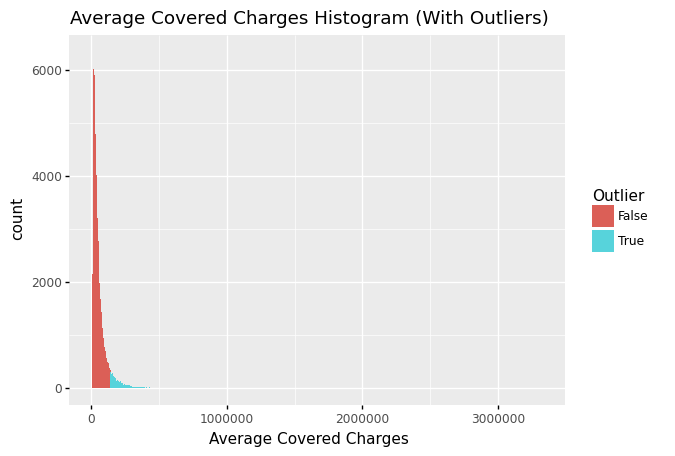

/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 105'. Pick better value with 'binwidth'.


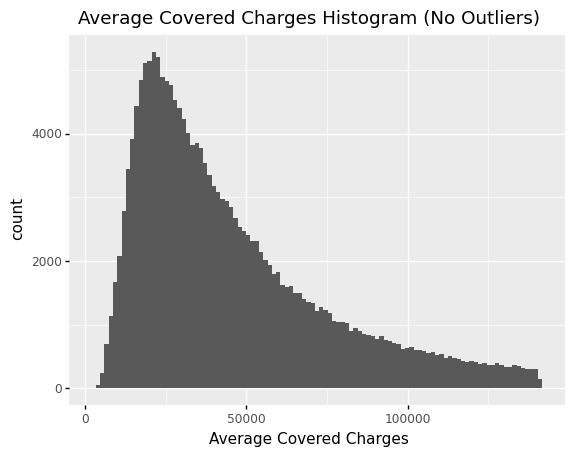




Location of Random Outliers:
       Provider Street Address  Provider City Provider State
122919    255 LAFAYETTE AVENUE        SUFFERN             NY
55498      5841 SOUTH MARYLAND        CHICAGO             IL
145319      700 NE 13TH STREET  OKLAHOMA CITY             OK
13996     225 N JACKSON AVENUE       SAN JOSE             CA
44359         5352 LINTON BLVD   DELRAY BEACH             FL
97089      45 WEST 10TH STREET     SAINT PAUL             MN
99124         4500 13TH STREET       GULFPORT             MS
33115        1350 S HICKORY ST      MELBOURNE             FL
30840        3800 RESERVOIR RD     WASHINGTON             DC
22402           1700 COFFEE RD        MODESTO             CA


In [5]:
avg_charge_df = pd.DataFrame()
avg_charge_df['Average Covered Charges'] = df['Average Covered Charges']
avg_q1, avg_q3= np.percentile(avg_charge_df, [25, 75])
avg_iqr = avg_q3 - avg_q1
avg_upper = avg_q3 + (1.5 * avg_iqr)
avg_charge_df['Outlier'] = avg_charge_df['Average Covered Charges'] > avg_upper

print(ggplot(avg_charge_df, aes(x='Average Covered Charges', fill='Outlier')) + geom_histogram() + 
      ggtitle('Average Covered Charges Histogram (With Outliers)'))

avg_no_outlier = avg_charge_df
avg_no_outlier["Outlier"] = avg_no_outlier["Outlier"].astype(int)
avg_no_outlier = avg_no_outlier[avg_no_outlier.Outlier != 1]

print(ggplot(avg_no_outlier, aes(x='Average Covered Charges')) + geom_histogram() +
      ggtitle('Average Covered Charges Histogram (No Outliers)'))

outliers = avg_charge_df
outliers["Outlier"] = outliers["Outlier"].astype(int)
outliers = outliers[outliers.Outlier == 1]
outlier_index = outliers.sample(10, random_state=6).index.tolist()
print('')
print('')
print('Location of Random Outliers:')
print(df.iloc[outlier_index, 3:6])

Like before, these seem to be expected outliers. Most of these locations are areas where there is a dense population.

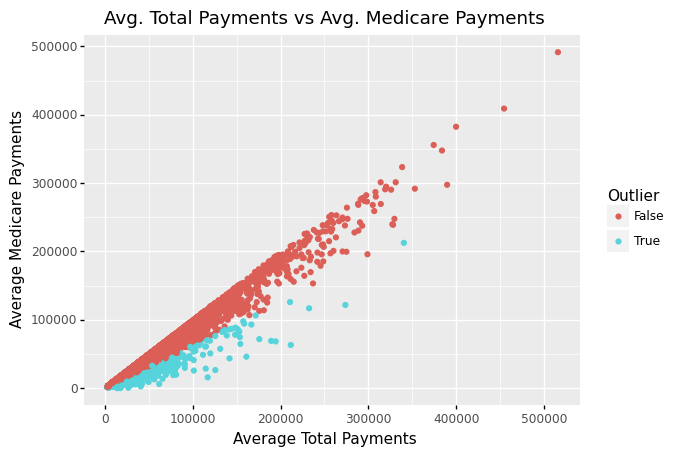




Location of Random Outliers:
               Provider Street Address     Provider City Provider State
103228             10010 KENNERLY ROAD       SAINT LOUIS             MO
187762                 500 17TH AVENUE           SEATTLE             WA
186994  1959 NE PACIFIC ST  BOX 356151           SEATTLE             WA
151740               815 FREEPORT ROAD        PITTSBURGH             PA
21585                     2540 EAST ST           CONCORD             CA
107570              6901 NORTH 72ND ST             OMAHA             NE
131566               101 MANNING DRIVE       CHAPEL HILL             NC
64136                 395 WESTFIELD RD       NOBLESVILLE             IN
54158             1 GOOD SAMARITAN WAY      MOUNT VERNON             IL
125843               211 CHURCH STREET  SARATOGA SPRINGS             NY


In [6]:
total_vs_medicare = pd.DataFrame()
total_vs_medicare['Average Total Payments'] = df['Average Total Payments']
total_vs_medicare['Average Medicare Payments'] = df['Average Medicare Payments']

total_vs_medicare['Ratio'] = df['Average Total Payments'] / df['Average Medicare Payments']
ratio_q1, ratio_q3 = np.percentile(total_vs_medicare['Ratio'], [25, 75])
ratio_iqr = ratio_q3 - ratio_q1
ratio_lower = ratio_q1 - (1.5 * ratio_iqr)
ratio_upper = ratio_q3 + (1.5 * ratio_iqr)
total_vs_medicare['Outlier'] = total_vs_medicare['Ratio'] < ratio_lower
total_vs_medicare['Outlier'] = total_vs_medicare['Ratio'] > ratio_upper

print(ggplot(total_vs_medicare, aes(x='Average Total Payments', y='Average Medicare Payments', color='Outlier'))
      + geom_point() + ggtitle('Avg. Total Payments vs Avg. Medicare Payments'))

outliers = total_vs_medicare
outliers["Outlier"] = outliers["Outlier"].astype(int)
outliers = outliers[outliers.Outlier == 1]
outlier_index = outliers.sample(10, random_state=6).index.tolist()
print('')
print('')
print('Location of Random Outliers:')
print(df.iloc[outlier_index, 3:6])

These outliers again seem to be expected based on the location. These are very active and central cities in each state. What may be surprising is the city of Seattle appearing twice.

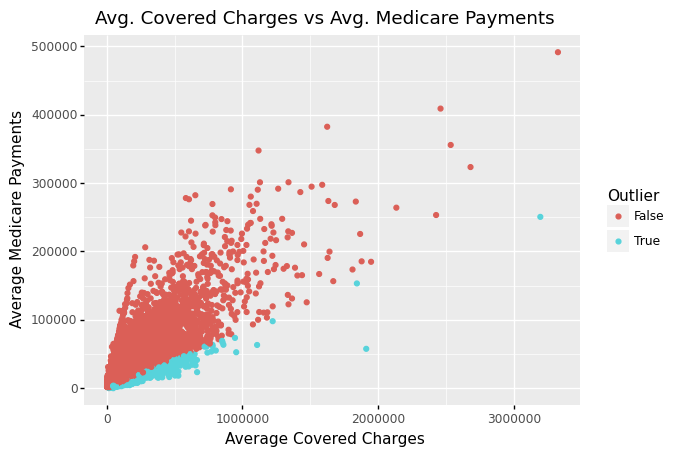




Location of Random Outliers:
       Provider Street Address Provider City Provider State
99308            2100 HWY 61 N     VICKSBURG             MS
44717        11375 CORTEZ BLVD   BROOKSVILLE             FL
42530     7201 N UNIVERSITY DR       TAMARAC             FL
23724        8700 BEVERLY BLVD   LOS ANGELES             CA
157325      100 ST LUKE'S LANE   STROUDSBURG             PA
42686        2001 KINGSLEY AVE   ORANGE PARK             FL
114160          110 REHILL AVE    SOMERVILLE             NJ
33845          1100 NW 95TH ST         MIAMI             FL
168652        3615 19TH STREET       LUBBOCK             TX
114560    425 JACK MARTIN BLVD         BRICK             NJ


In [7]:
covered_vs_medicare = pd.DataFrame()
covered_vs_medicare['Average Covered Charges'] = df['Average Covered Charges']
covered_vs_medicare['Average Medicare Payments'] = df['Average Medicare Payments']

covered_vs_medicare['Ratio'] = df['Average Covered Charges'] / df['Average Medicare Payments']
ratio2_q1, ratio2_q3 = np.percentile(covered_vs_medicare['Ratio'], [25, 75])
ratio2_iqr = ratio2_q3 - ratio2_q1
ratio2_lower = ratio2_q1 - (1.5 * ratio2_iqr)
ratio2_upper = ratio2_q3 + (1.5 * ratio2_iqr)
covered_vs_medicare['Outlier'] = covered_vs_medicare['Ratio'] < ratio2_lower
covered_vs_medicare['Outlier'] = covered_vs_medicare['Ratio'] > ratio2_upper

print(ggplot(covered_vs_medicare, aes(x='Average Covered Charges', y='Average Medicare Payments', color='Outlier'))
      + geom_point() + ggtitle('Avg. Covered Charges vs Avg. Medicare Payments'))

outliers = covered_vs_medicare
outliers["Outlier"] = outliers["Outlier"].astype(int)
outliers = outliers[outliers.Outlier == 1]
outlier_index = outliers.sample(10, random_state=6).index.tolist()
print('')
print('')
print('Location of Random Outliers:')
print(df.iloc[outlier_index, 3:6])

The one surprising factor about these outliers is that the state of Florida appears 4 times. But like before, these are locations that have a pretty dense and active population.

# 2: Transforming Data

In [8]:
top100_list = df['DRG Definition'].value_counts()[:100].index.tolist()
top100 = df.loc[df['DRG Definition'].isin(top100_list)]
top100['DRG Definition'] = "DRG Charges " + top100['DRG Definition'].str[:3]
top100 = pd.pivot_table(top100, values='Average Covered Charges',
                       index=['Provider Id', 'Provider State'],
                       columns=['DRG Definition']).reset_index()
top100

<ipython-input-8-ef8b3b0d6d5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


DRG Definition,Provider Id,Provider State,DRG Charges 039,DRG Charges 057,DRG Charges 064,DRG Charges 065,DRG Charges 066,DRG Charges 069,DRG Charges 092,DRG Charges 100,...,DRG Charges 812,DRG Charges 853,DRG Charges 870,DRG Charges 871,DRG Charges 872,DRG Charges 897,DRG Charges 917,DRG Charges 918,DRG Charges 948,DRG Charges 981
0,10001,AL,41130.56,25434.17,46240.00,33440.09,30566.49,30004.42,25485.12,47017.81,...,20394.23,119598.10,146858.55,48672.35,30927.54,12753.20,34665.44,19832.71,NaN,93837.95
1,10005,AL,14450.08,NaN,26866.23,14336.27,13158.84,16008.44,NaN,NaN,...,11466.57,76183.18,69936.53,22616.08,15294.55,9511.50,15524.04,10599.77,12574.92,NaN
2,10006,AL,35486.58,24472.15,35674.07,24571.08,20953.62,17277.38,NaN,43030.20,...,19740.50,114219.82,138618.91,44327.62,23283.30,14717.18,28885.41,14272.07,NaN,100218.22
3,10007,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11787.20,NaN,NaN,20484.80,10145.17,NaN,NaN,NaN,7629.18,NaN
4,10008,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17771.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,670112,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3165,670116,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3166,670119,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3167,670120,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,147342.18,NaN,NaN,NaN,NaN,NaN,NaN


# 3: Correlation and Scatterplots

In [25]:
new_top = top100.drop(columns=['Provider Id', 'Provider State'])
correlations = {}

for i in range(100):
    for j in range(i+1, 100):
        correlations[str(i) + "," + str(j)] = new_top.iloc[:,i].corr(new_top.iloc[:,j])

top = sorted(correlations, key=correlations.get, reverse=True)[:2]
low = sorted(correlations, key=correlations.get)[:2]

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2378 rows containing missing values.


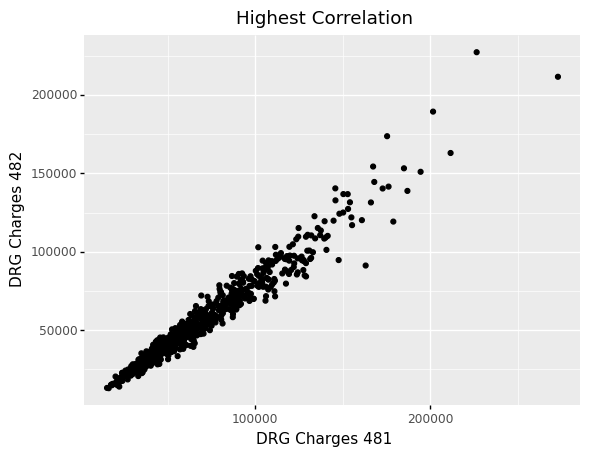

In [27]:
top1_drg_1 = new_top.columns[int(top[0][:2])]
top1_drg_2 = new_top.columns[int(top[0][3:5])]
print(ggplot(new_top, aes(x=top1_drg_1, y=top1_drg_2)) + geom_point() + ggtitle('Highest Correlation'))

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1777 rows containing missing values.


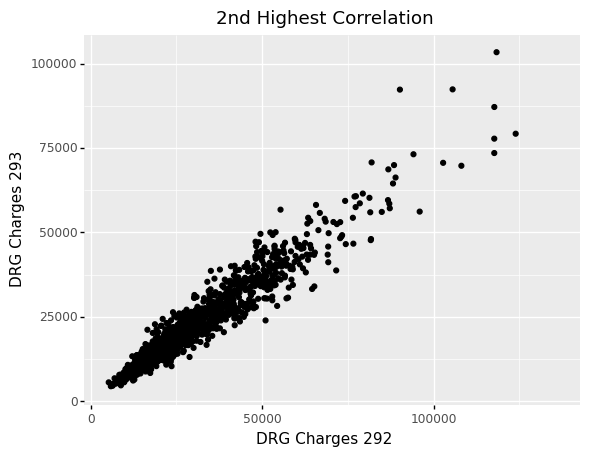

In [18]:
top2_drg_1 = new_top.columns[int(top[1][:2])]
top2_drg_2 = new_top.columns[int(top[1][3:5])]
print(ggplot(new_top, aes(x=top2_drg_1, y=top2_drg_2)) + geom_point() + ggtitle('2nd Highest Correlation'))

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2815 rows containing missing values.


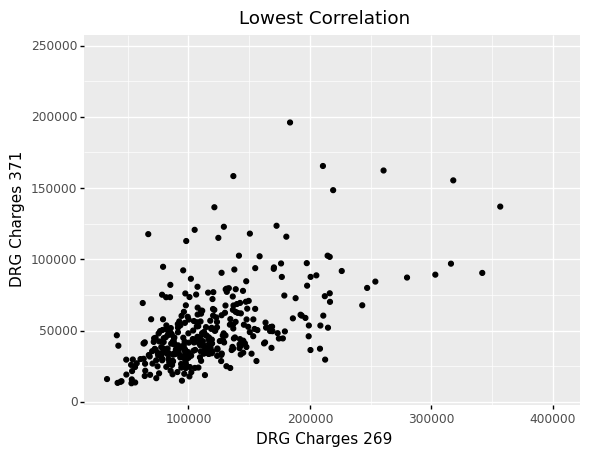

In [19]:
low1_drg_1 = new_top.columns[int(low[0][:2])]
low1_drg_2 = new_top.columns[int(low[0][3:5])]
print(ggplot(new_top, aes(x=low1_drg_1, y=low1_drg_2)) + geom_point() + ggtitle('Lowest Correlation'))

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2629 rows containing missing values.


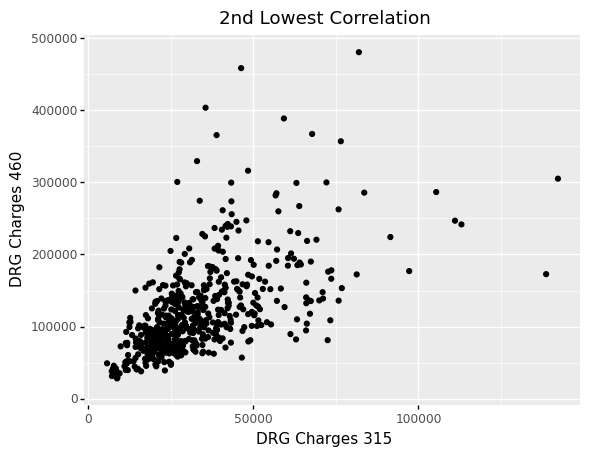

In [20]:
low2_drg_1 = new_top.columns[int(low[1][:2])]
low2_drg_2 = new_top.columns[int(low[1][3:5])]
print(ggplot(new_top, aes(x=low2_drg_1, y=low2_drg_2)) + geom_point() + ggtitle('2nd Lowest Correlation'))

In [21]:
print("Highest Correlations: ")
print("    DRG Charges", new_top.columns[int(top[0][:2])][-3:], "," ,
      new_top.columns[int(top[0][3:5])][-3:], ": ", correlations.get(top[0]))
print("    DRG Charges", new_top.columns[int(top[1][:2])][-3:], "," ,
      new_top.columns[int(top[1][3:5])][-3:], ": ", correlations.get(top[1]))

print("Lowest Correlations: ")
print("    DRG Charges", new_top.columns[int(low[0][:2])][-3:], "," ,
      new_top.columns[int(low[0][3:5])][-3:], ": ", correlations.get(low[0]))
print("    DRG Charges", new_top.columns[int(low[1][:2])][-3:], "," ,
      new_top.columns[int(low[1][3:5])][-3:], ": ", correlations.get(low[1]))

Highest Correlations: 
    DRG Charges 481 , 482 :  0.9776531427834125
    DRG Charges 292 , 293 :  0.9612236108383383
Lowest Correlations: 
    DRG Charges 269 , 371 :  0.5684269349479398
    DRG Charges 315 , 460 :  0.5835260020031633


The correlation values calculated appear to be represented accurately in the scatterplots. The first 2 scatterplots representing the highest correlations clearly have a more linear relationship showing high correlation between the DRG Charge features. The 2 bottom scatterplots represent the lowest correlations and they clearly appear to lack any sense of linearity and relationship as it is more random and scattered.

# 4: Boxplots and T-Tests

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 113 rows containing non-finite values.


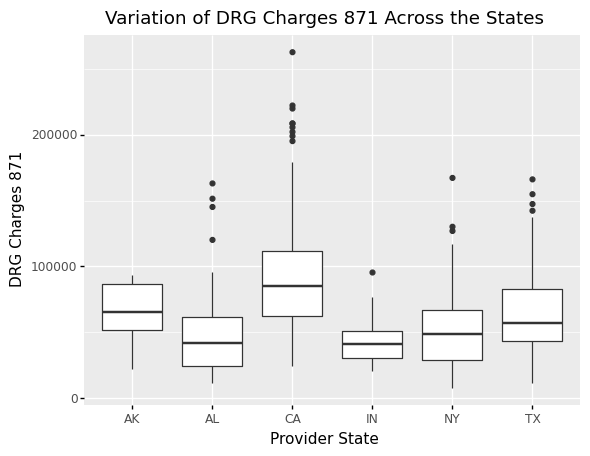

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 258 rows containing non-finite values.


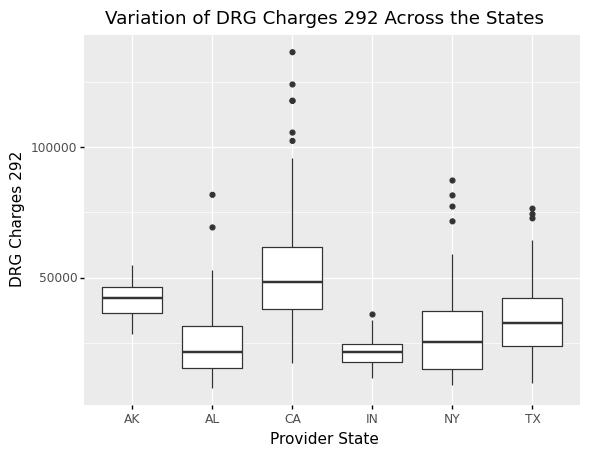

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 538 rows containing non-finite values.


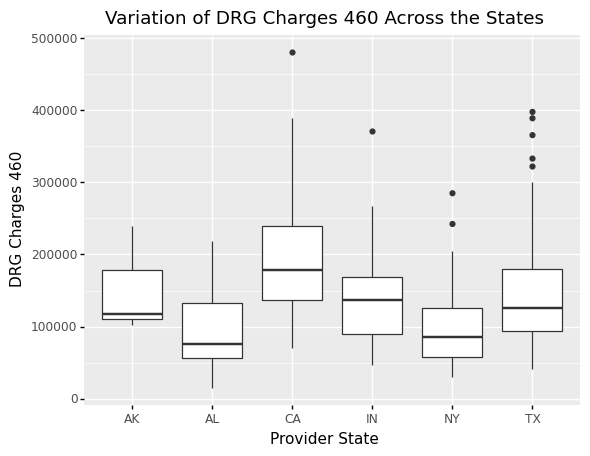

In [28]:
states_list = ['CA', 'IN', 'TX', 'NY', 'AK', 'AL']
states_df = top100.loc[top100['Provider State'].isin(states_list)]

# states_df = states_df.groupby(['Provider State']).sum()
# x = states_df.drop(columns='Provider Id').var()
# variance = states_df.drop(columns='Provider Id').T
# variance['Variance'] = x
# variance = variance.sort_values(by=['Variance']).drop(columns='Variance')
# states_df = variance.T.reset_index()
# states_df

print(ggplot(states_df, aes(x='Provider State', y='DRG Charges 871')) + geom_boxplot() +
      ggtitle('Variation of DRG Charges 871 Across the States'))
print(ggplot(states_df, aes(x='Provider State', y='DRG Charges 292')) + geom_boxplot() +
      ggtitle('Variation of DRG Charges 292 Across the States'))
print(ggplot(states_df, aes(x='Provider State', y='DRG Charges 460')) + geom_boxplot() +
      ggtitle('Variation of DRG Charges 460 Across the States'))

From the boxplots above, it appears that CA and AL have the most significant differences in their DRG Charges 460.

H0: There is no significant difference in DRG Charges 460 between California and Alaska.

H1: There is a significant difference in DRG Charges 460 between California and Alaska. 

In [29]:
ca_drg_406 = states_df[states_df['Provider State'] == 'CA']['DRG Charges 460'].dropna()
al_drg_460 = states_df[states_df['Provider State'] == 'AL']['DRG Charges 460'].dropna()
ca_drg_406 = ca_drg_406.sample(len(al_drg_460), random_state=6)
t, p = stats.ttest_ind(ca_drg_406, al_drg_460)
print('t statistic:', t)
print('p-value:', p)
if p < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

t statistic: 4.230296841219688
p-value: 0.0001236679501234555
reject null hypothesis


The test above is a two-sample unpaired two-sided t-test. Since the resulting p-value is a lot lower than the alpha of 0.05, we can confidently reject the null hypothesis that there is no significant difference in DRG Charges 460 between California and Alaska. This supports the claim that there is a significant difference in DRG Charges 460 between California and Alaska. From our t statistic value, we can also conclude that the California DRG Charges 460 are higher than Alaska.

H0: There is no significant difference in all DRG Charges between California and Indiana.

H1: There is a significant difference in all DRG Charges between California and Indiana.

In [30]:
ca_drg = (states_df[states_df['Provider State'] == 'CA'][['DRG Charges 460',
                                                         'DRG Charges 292', 'DRG Charges 871']].dropna())
in_drg = (states_df[states_df['Provider State'] == 'IN'][['DRG Charges 460',
                                                         'DRG Charges 292', 'DRG Charges 871']].dropna())
ca_drg = ca_drg.sample(len(in_drg), random_state=6)
ca_drg = ca_drg.melt(value_vars=['DRG Charges 460', 'DRG Charges 292', 'DRG Charges 871'])['value']
in_drg = in_drg.melt(value_vars=['DRG Charges 460', 'DRG Charges 292', 'DRG Charges 871'])['value']

t1, p1 = stats.ttest_rel(ca_drg, in_drg)
t2, p2 = stats.ttest_ind(ca_drg, in_drg)

print("Paired t-test:")
print('    t statistic:', t1)
print('    p-value:', p1)
if p1 < 0.05:
    print('    reject null hypothesis')
else:
    print('    accept null hypothesis')
    
print("Unpaired t-test:")
print('    t statistic:', t2)
print('    p-value:', p2)
if p2 < 0.05:
    print('    reject null hypothesis')
else:
    print('    accept null hypothesis')

Paired t-test:
    t statistic: 10.044665854827931
    p-value: 5.347506144674922e-17
    reject null hypothesis
Unpaired t-test:
    t statistic: 5.853519055121387
    p-value: 1.8533297468139595e-08
    reject null hypothesis


From the results of both the paired and unpaired t-tests, we can confidently reject the null hypothesis and support the claim that there is a significant difference in DRG between California and Indiana. Both of the t-statistic values futhermore show that the DRG values are a lot higher in California than Indiana. Between both of the tests, the paired t-test resulted values of higher magnitude compared ot the unpaired test. The t-statistic in the paired t-test was a lot higher than the unpaired t-test. The p-value was also significantly lower in the paired t-test compared to the unpaired t-test. While using both t-tests would give us the same conclusions, using the paired t-test would give us a more confident rejection of the null hypothesis and stronger support to the claim that there is a significant difference in DRG between California and Indiana.